In [234]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [235]:
# Reading data from csv file
ds = pd.read_csv('ElectionData.csv')
ds

TimeElapsed                 time        territoryName  totalMandates  \
0                0  2019-10-06 20:10:02  Território Nacional              0   
1                0  2019-10-06 20:10:02  Território Nacional              0   
2                0  2019-10-06 20:10:02  Território Nacional              0   
3                0  2019-10-06 20:10:02  Território Nacional              0   
4                0  2019-10-06 20:10:02  Território Nacional              0   
...            ...                  ...                  ...            ...   
21638          265  2019-10-07 00:35:01                Viseu              8   
21639          265  2019-10-07 00:35:01                Viseu              8   
21640          265  2019-10-07 00:35:01                Viseu              8   
21641          265  2019-10-07 00:35:01                Viseu              8   
21642          265  2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...    

In [236]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(21643, 28)

In [237]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (21643, 28)
Shape of dataset after removing duplicates:  (21643, 28)


In [238]:
# Checking the columns of the dataset as on which features, 'FinalMandate' is dependent
ds.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [239]:
# Checking the datatypes of the columns
ds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [240]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [241]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt',
       'FinalMandates'],
      dtype='object')

In [242]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['time', 'territoryName', 'Party'], dtype='object')

# Statistical Summary

In [243]:
ds.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

In [244]:
# Checking for null values
ds.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

No null values are present in the dataset

In [245]:
# Checking for NaN values
ds.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

No NaN values are present in the dataset

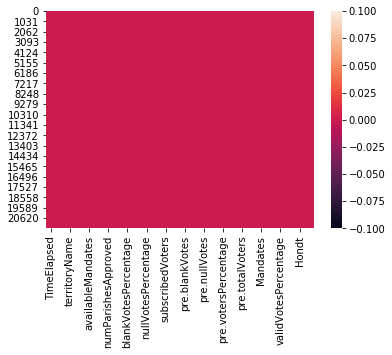

In [246]:
# Checking null values through heatmap visualization
sns.heatmap(ds.isnull())

# Checking the corelation

In [247]:
# Checking the corelation
ds.corr()

TimeElapsed  totalMandates  availableMandates  \
TimeElapsed                  1.000000       0.260377          -0.261627   
totalMandates                0.260377       1.000000           0.217404   
availableMandates           -0.261627       0.217404           1.000000   
numParishes                 -0.001944       0.765877           0.745472   
numParishesApproved          0.100432       0.873415           0.562719   
blankVotes                   0.192350       0.969988           0.390638   
blankVotesPercentage         0.034343      -0.003149          -0.002806   
nullVotes                    0.185784       0.967294           0.407366   
nullVotesPercentage         -0.225021      -0.165132           0.029915   
votersPercentage             0.029698       0.171317           0.112293   
subscribedVoters             0.195487       0.974407           0.385828   
totalVoters                  0.198243       0.976336           0.379093   
pre.blankVotes               0.195734       0.973357           0.383877   
pre.blankVotesPercentage     0.093739       0.034774          -0.008966   
pre.nullVotes                0.189902       0.969992           0.399074   
pre.nullVotesPercentage     -0.106054      -0.132143          -0.044174   
pre.votersPercentage         0.054761       0.151927           0.080524   
pre.subscribedVoters         0.193160       0.972976           0.391272   
pre.totalVoters              0.196667       0.975404           0.383089   
Mandates                     0.090190       0.336989           0.072320   
Percentage                   0.000767      -0.010171          -0.011083   
validVotesPercentage         0.000526      -0.010474          -0.011052   
Votes                        0.082417       0.395617           0.152348   
Hondt                       -0.001100       0.288420           0.291310   
FinalMandates               -0.001007       0.264117           0.266764   

                          numParishes  numParishesApproved  blankVotes  \
TimeElapsed                 -0.001944             0.100432    0.192350   
totalMandates                0.765877             0.873415    0.969988   
availableMandates            0.745472             0.562719    0.390638   
numParishes                  1.000000             0.954092    0.861279   
numParishesApproved          0.954092             1.000000    0.951265   
blankVotes                   0.861279             0.951265    1.000000   
blankVotesPercentage         0.032013             0.035153    0.038503   
nullVotes                    0.870240             0.956142    0.998781   
nullVotesPercentage          0.013209            -0.037416   -0.150894   
votersPercentage             0.073855             0.081157    0.183970   
subscribedVoters             0.856855             0.946191    0.998297   
totalVoters                  0.850881             0.940941    0.997951   
pre.blankVotes               0.856779             0.947190    0.999657   
pre.blankVotesPercentage     0.036461             0.050378    0.072183   
pre.nullVotes                0.864837             0.951899    0.997490   
pre.nullVotesPercentage     -0.058017            -0.073301   -0.150275   
pre.votersPercentage         0.026407             0.042180    0.161642   
pre.subscribedVoters         0.860782             0.949110    0.998487   
pre.totalVoters              0.853779             0.943147    0.998178   
Mandates                     0.257365             0.293795    0.326630   
Percentage                  -0.010770            -0.009840   -0.011883   
validVotesPercentage        -0.010624            -0.009767   -0.012002   
Votes                        0.343593             0.380311    0.404003   
Hondt                        0.359283             0.340901    0.322780   
FinalMandates                0.329009             0.312177    0.295583   

                          blankVotesPercentage  nullVotes  \
TimeElapsed                           0.034343   0.185784   
totalMandates               

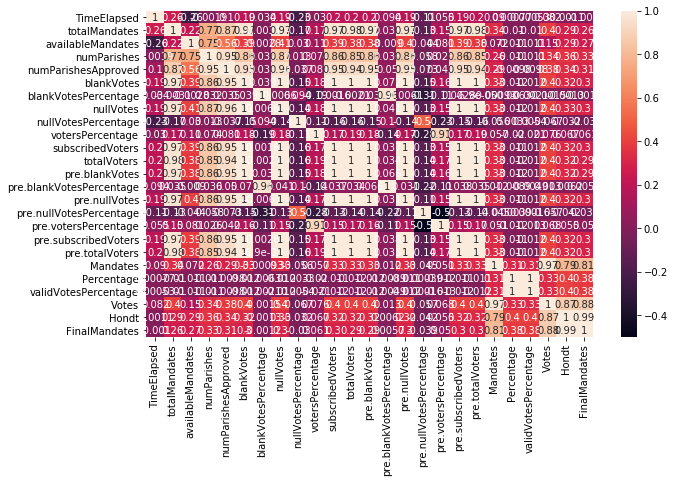

In [248]:
# checking the corelation through heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(ds.corr(), annot=True)

Above heatmap shows the corelation between the different features of dataset.
It seems many features are strongly corelated

# Plotting Outliers

# Univariate Analysis

Boxplot

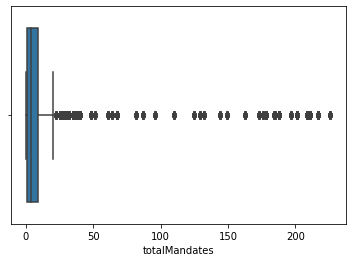

In [249]:
sns.boxplot(ds['totalMandates'])
plt.show()

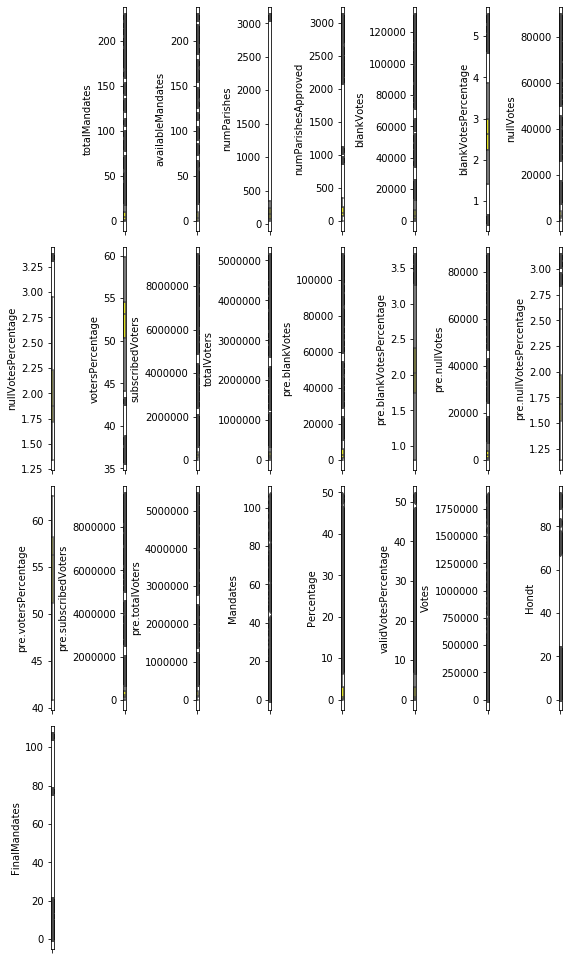

In [250]:
# Boxplot for all the columns
collist = ds_int.columns.values
nrows = 12
ncols = 8

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds_int[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

It seems outliers are present in the dataset

# Histograms

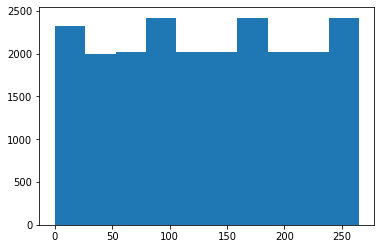

In [251]:
plt.hist(ds['TimeElapsed'])
plt.show()

<Figure size 864x1080 with 0 Axes>

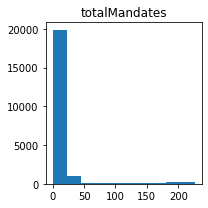

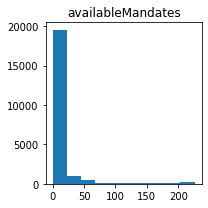

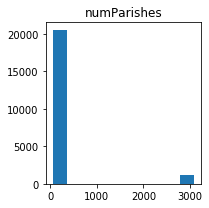

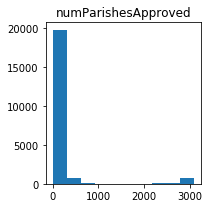

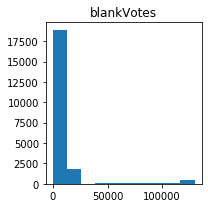

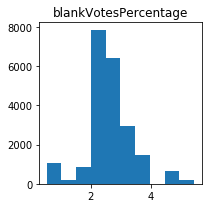

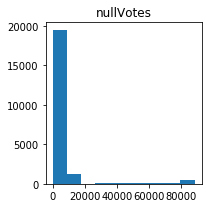

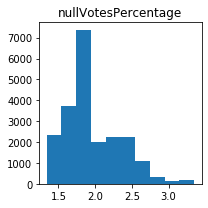

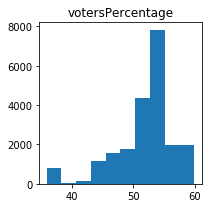

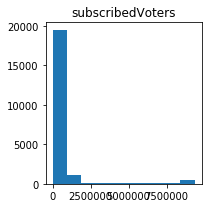

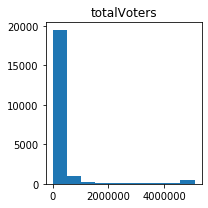

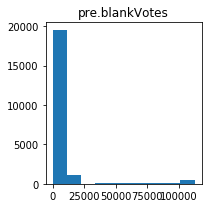

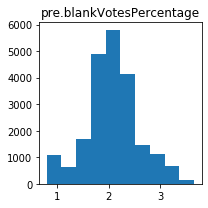

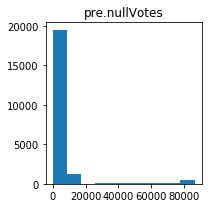

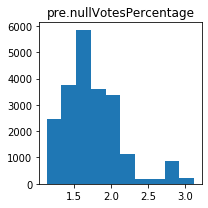

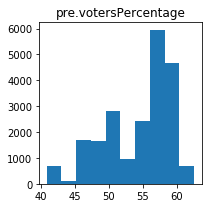

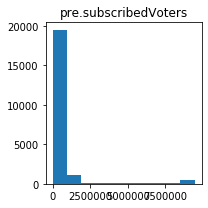

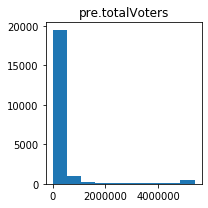

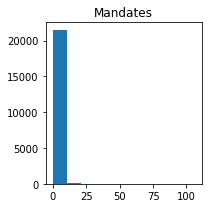

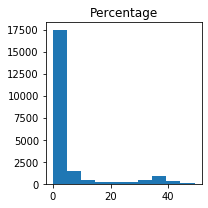

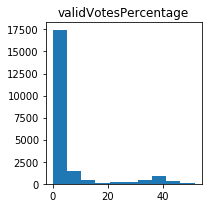

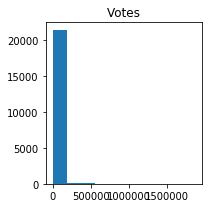

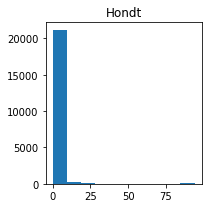

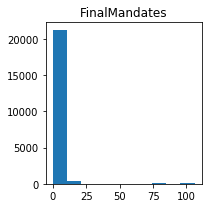

In [252]:
# Histogram for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    plt.hist(ds_int[collist[i]])
    plt.tight_layout()

# Violinplot

It shows where the maximum value of data lies

<Figure size 864x1080 with 0 Axes>

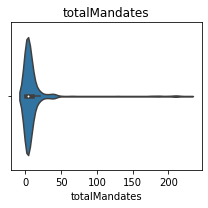

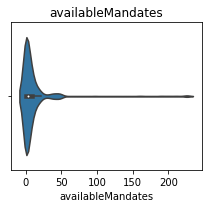

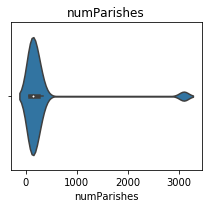

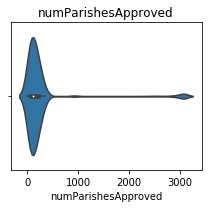

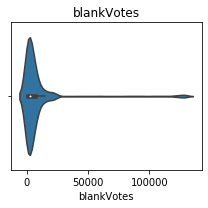

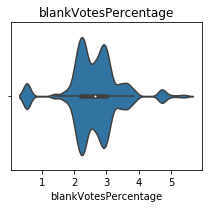

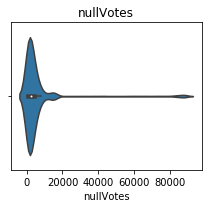

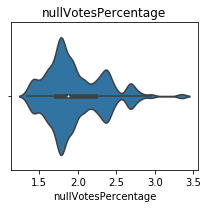

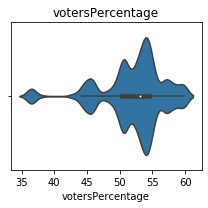

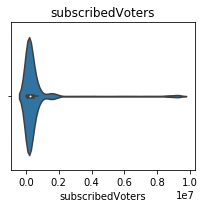

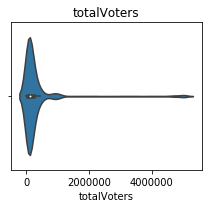

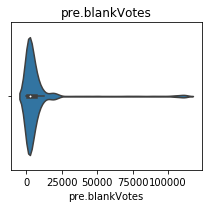

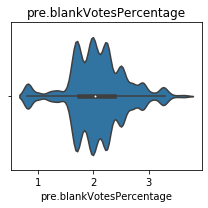

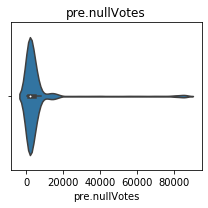

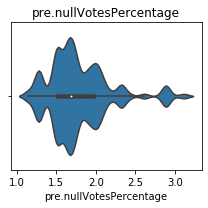

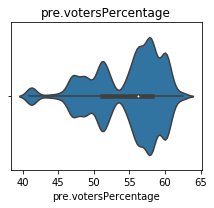

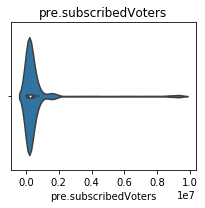

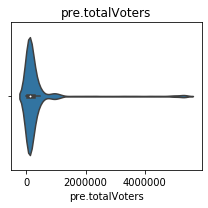

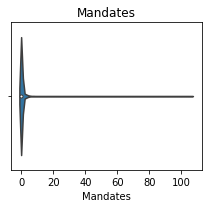

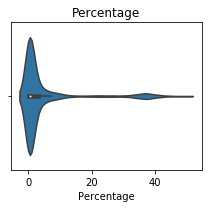

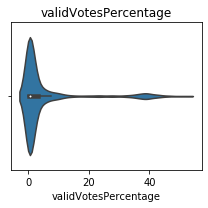

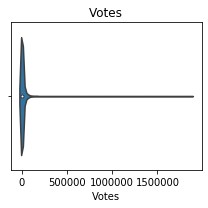

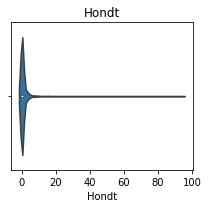

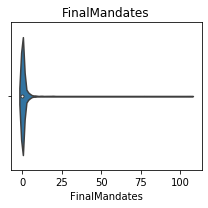

In [253]:
# Violinplot for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    sns.violinplot(ds_int[collist[i]])
    plt.tight_layout()

# Distribution plots to check the skewness of data

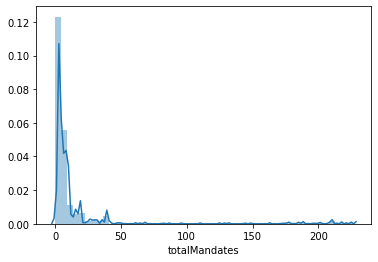

In [254]:
sns.distplot(ds_int['totalMandates'])
plt.show()

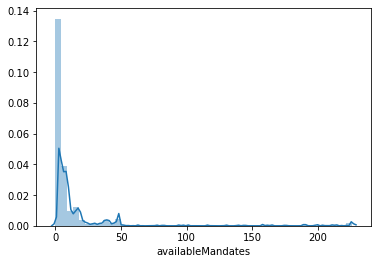

In [255]:
sns.distplot(ds_int['availableMandates'])
plt.show()

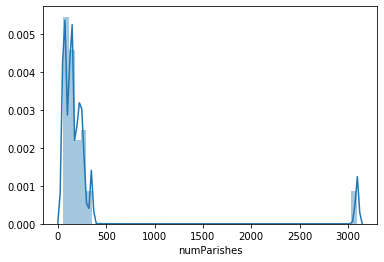

In [256]:
sns.distplot(ds_int['numParishes'])
plt.show()

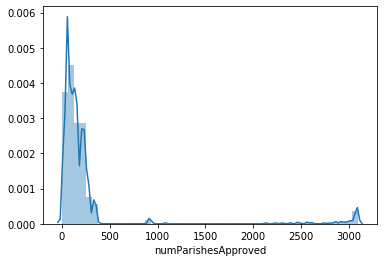

In [257]:
sns.distplot(ds_int['numParishesApproved'])
plt.show()

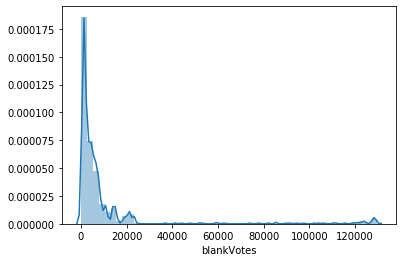

In [258]:
sns.distplot(ds_int['blankVotes'])
plt.show()

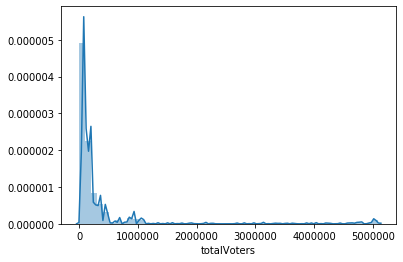

In [259]:
sns.distplot(ds_int['totalVoters'])
plt.show()

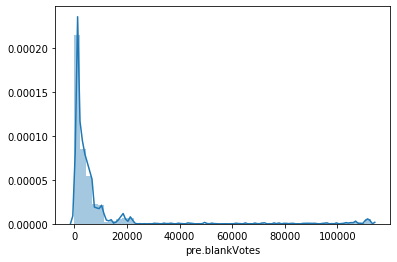

In [260]:
sns.distplot(ds_int['pre.blankVotes'])
plt.show()

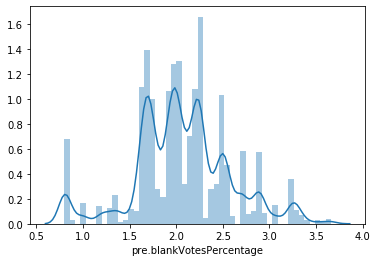

In [261]:
sns.distplot(ds['pre.blankVotesPercentage'])
plt.show()

It seems data is not normally distributed, data is skewed

# Bivariate Analysis

Barplot

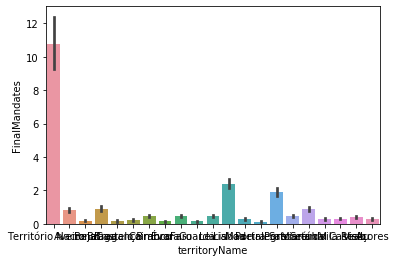

In [262]:
sns.barplot(x='territoryName', y='FinalMandates' , data=ds)
plt.show()

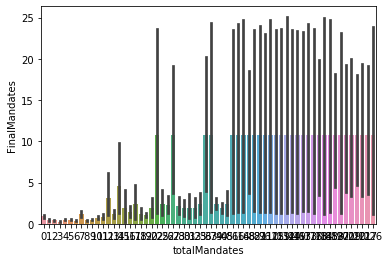

In [263]:
sns.barplot(x='totalMandates', y='FinalMandates' , data=ds)
plt.show()

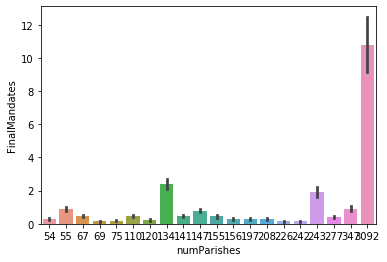

In [264]:
sns.barplot(x='numParishes', y='FinalMandates' , data=ds)
plt.show()

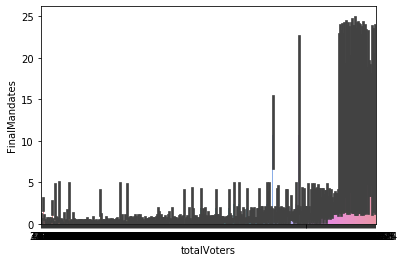

In [265]:
sns.barplot(x='totalVoters', y='FinalMandates' , data=ds)
plt.show()

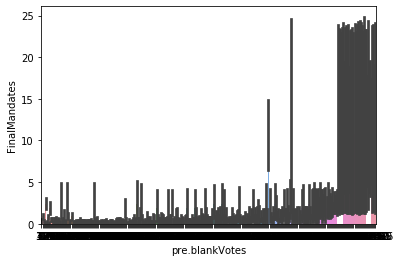

In [266]:
sns.barplot(x='pre.blankVotes', y='FinalMandates' , data=ds)
plt.show()

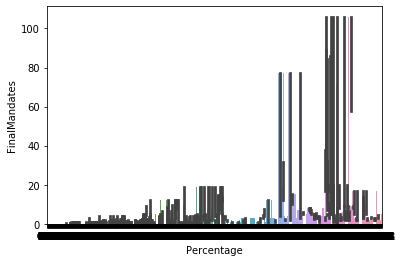

In [267]:
sns.barplot(x='Percentage', y='FinalMandates' , data=ds)
plt.show()

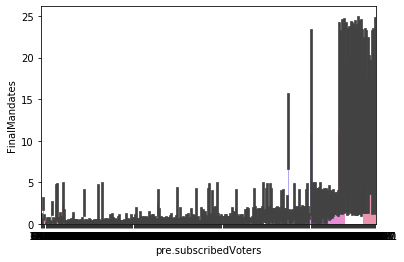

In [268]:
sns.barplot(x='pre.subscribedVoters', y='FinalMandates' , data=ds)
plt.show()

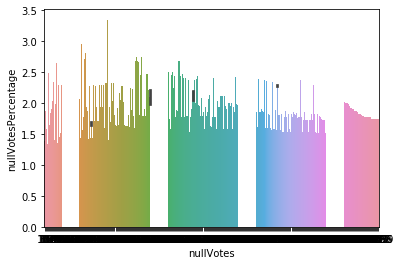

In [269]:
sns.barplot(x='nullVotes', y='nullVotesPercentage' , data=ds)
plt.show()

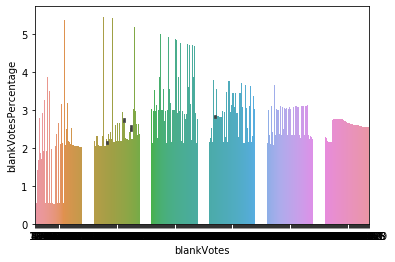

In [270]:
sns.barplot(x='blankVotes', y='blankVotesPercentage' , data=ds)
plt.show()

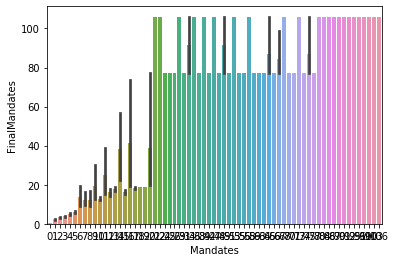

In [271]:
sns.barplot(x='Mandates', y='FinalMandates' , data=ds)
plt.show()

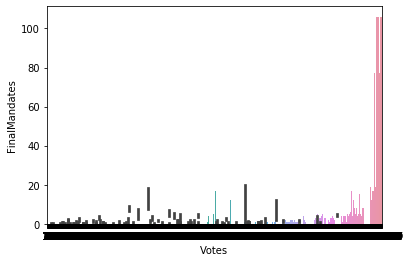

In [272]:
sns.barplot(x='Votes', y='FinalMandates' , data=ds)
plt.show()

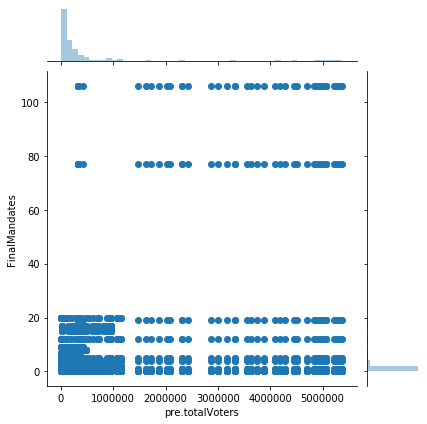

In [273]:
sns.jointplot(data=ds, x="pre.totalVoters", y="FinalMandates" )
plt.show()

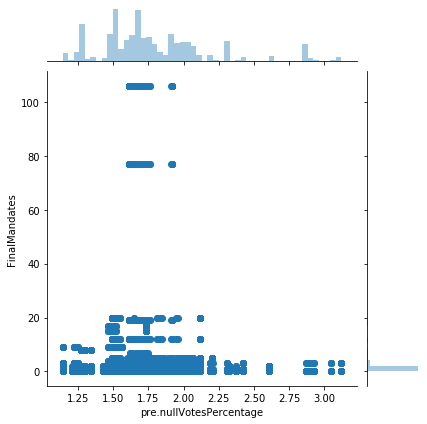

In [274]:
sns.jointplot(data=ds, x="pre.nullVotesPercentage", y="FinalMandates" )
plt.show()

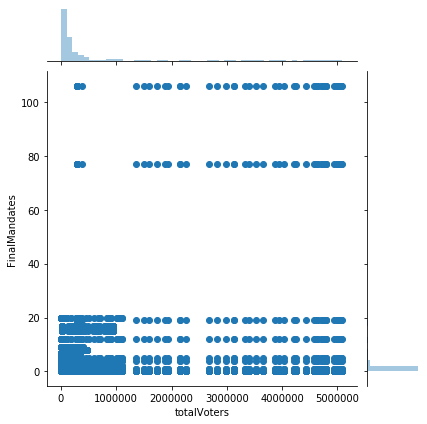

In [275]:
sns.jointplot(data=ds, x="totalVoters", y="FinalMandates" )
plt.show()

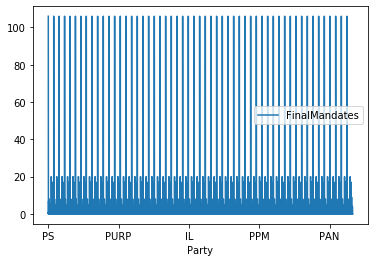

In [276]:
ds.plot(x='Party', y='FinalMandates', kind = 'line')
plt.show()

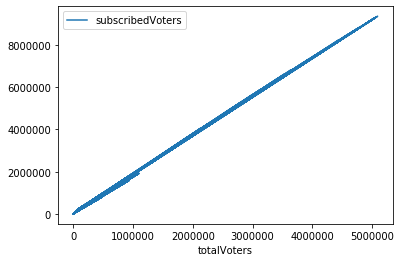

In [277]:
ds.plot(x='totalVoters', y='subscribedVoters', kind = 'line')
plt.show()

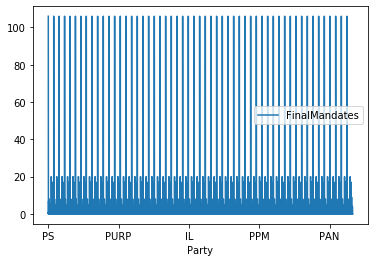

In [278]:
ds.plot(x='Party', y='FinalMandates', kind = 'line')
plt.show()

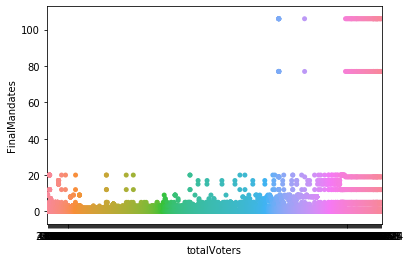

In [279]:
sns.stripplot(x='totalVoters', y='FinalMandates', data=ds)
plt.show()

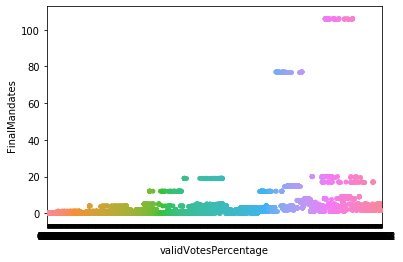

In [280]:
sns.stripplot(x='validVotesPercentage', y='FinalMandates', data=ds)
plt.show()

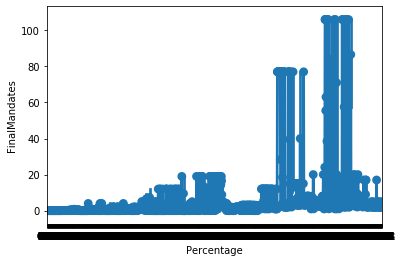

In [281]:
sns.pointplot(x='Percentage', y='FinalMandates', data=ds)
plt.show()

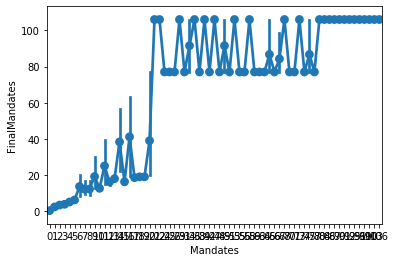

In [282]:
sns.pointplot(x='Mandates', y='FinalMandates', data=ds)
plt.show()

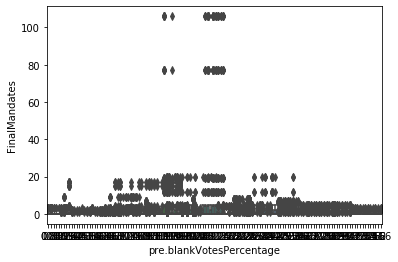

In [283]:
sns.boxplot(x='pre.blankVotesPercentage', y='FinalMandates', data=ds)
plt.show()

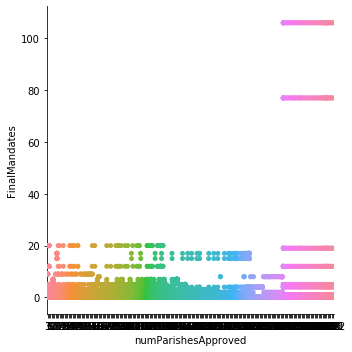

In [284]:
sns.catplot(x='numParishesApproved', y='FinalMandates' ,data=ds)
plt.show()

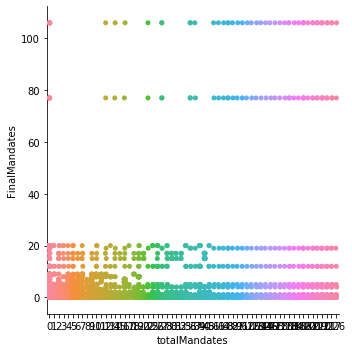

In [285]:
sns.catplot(x='totalMandates', y='FinalMandates' ,data=ds)
plt.show()

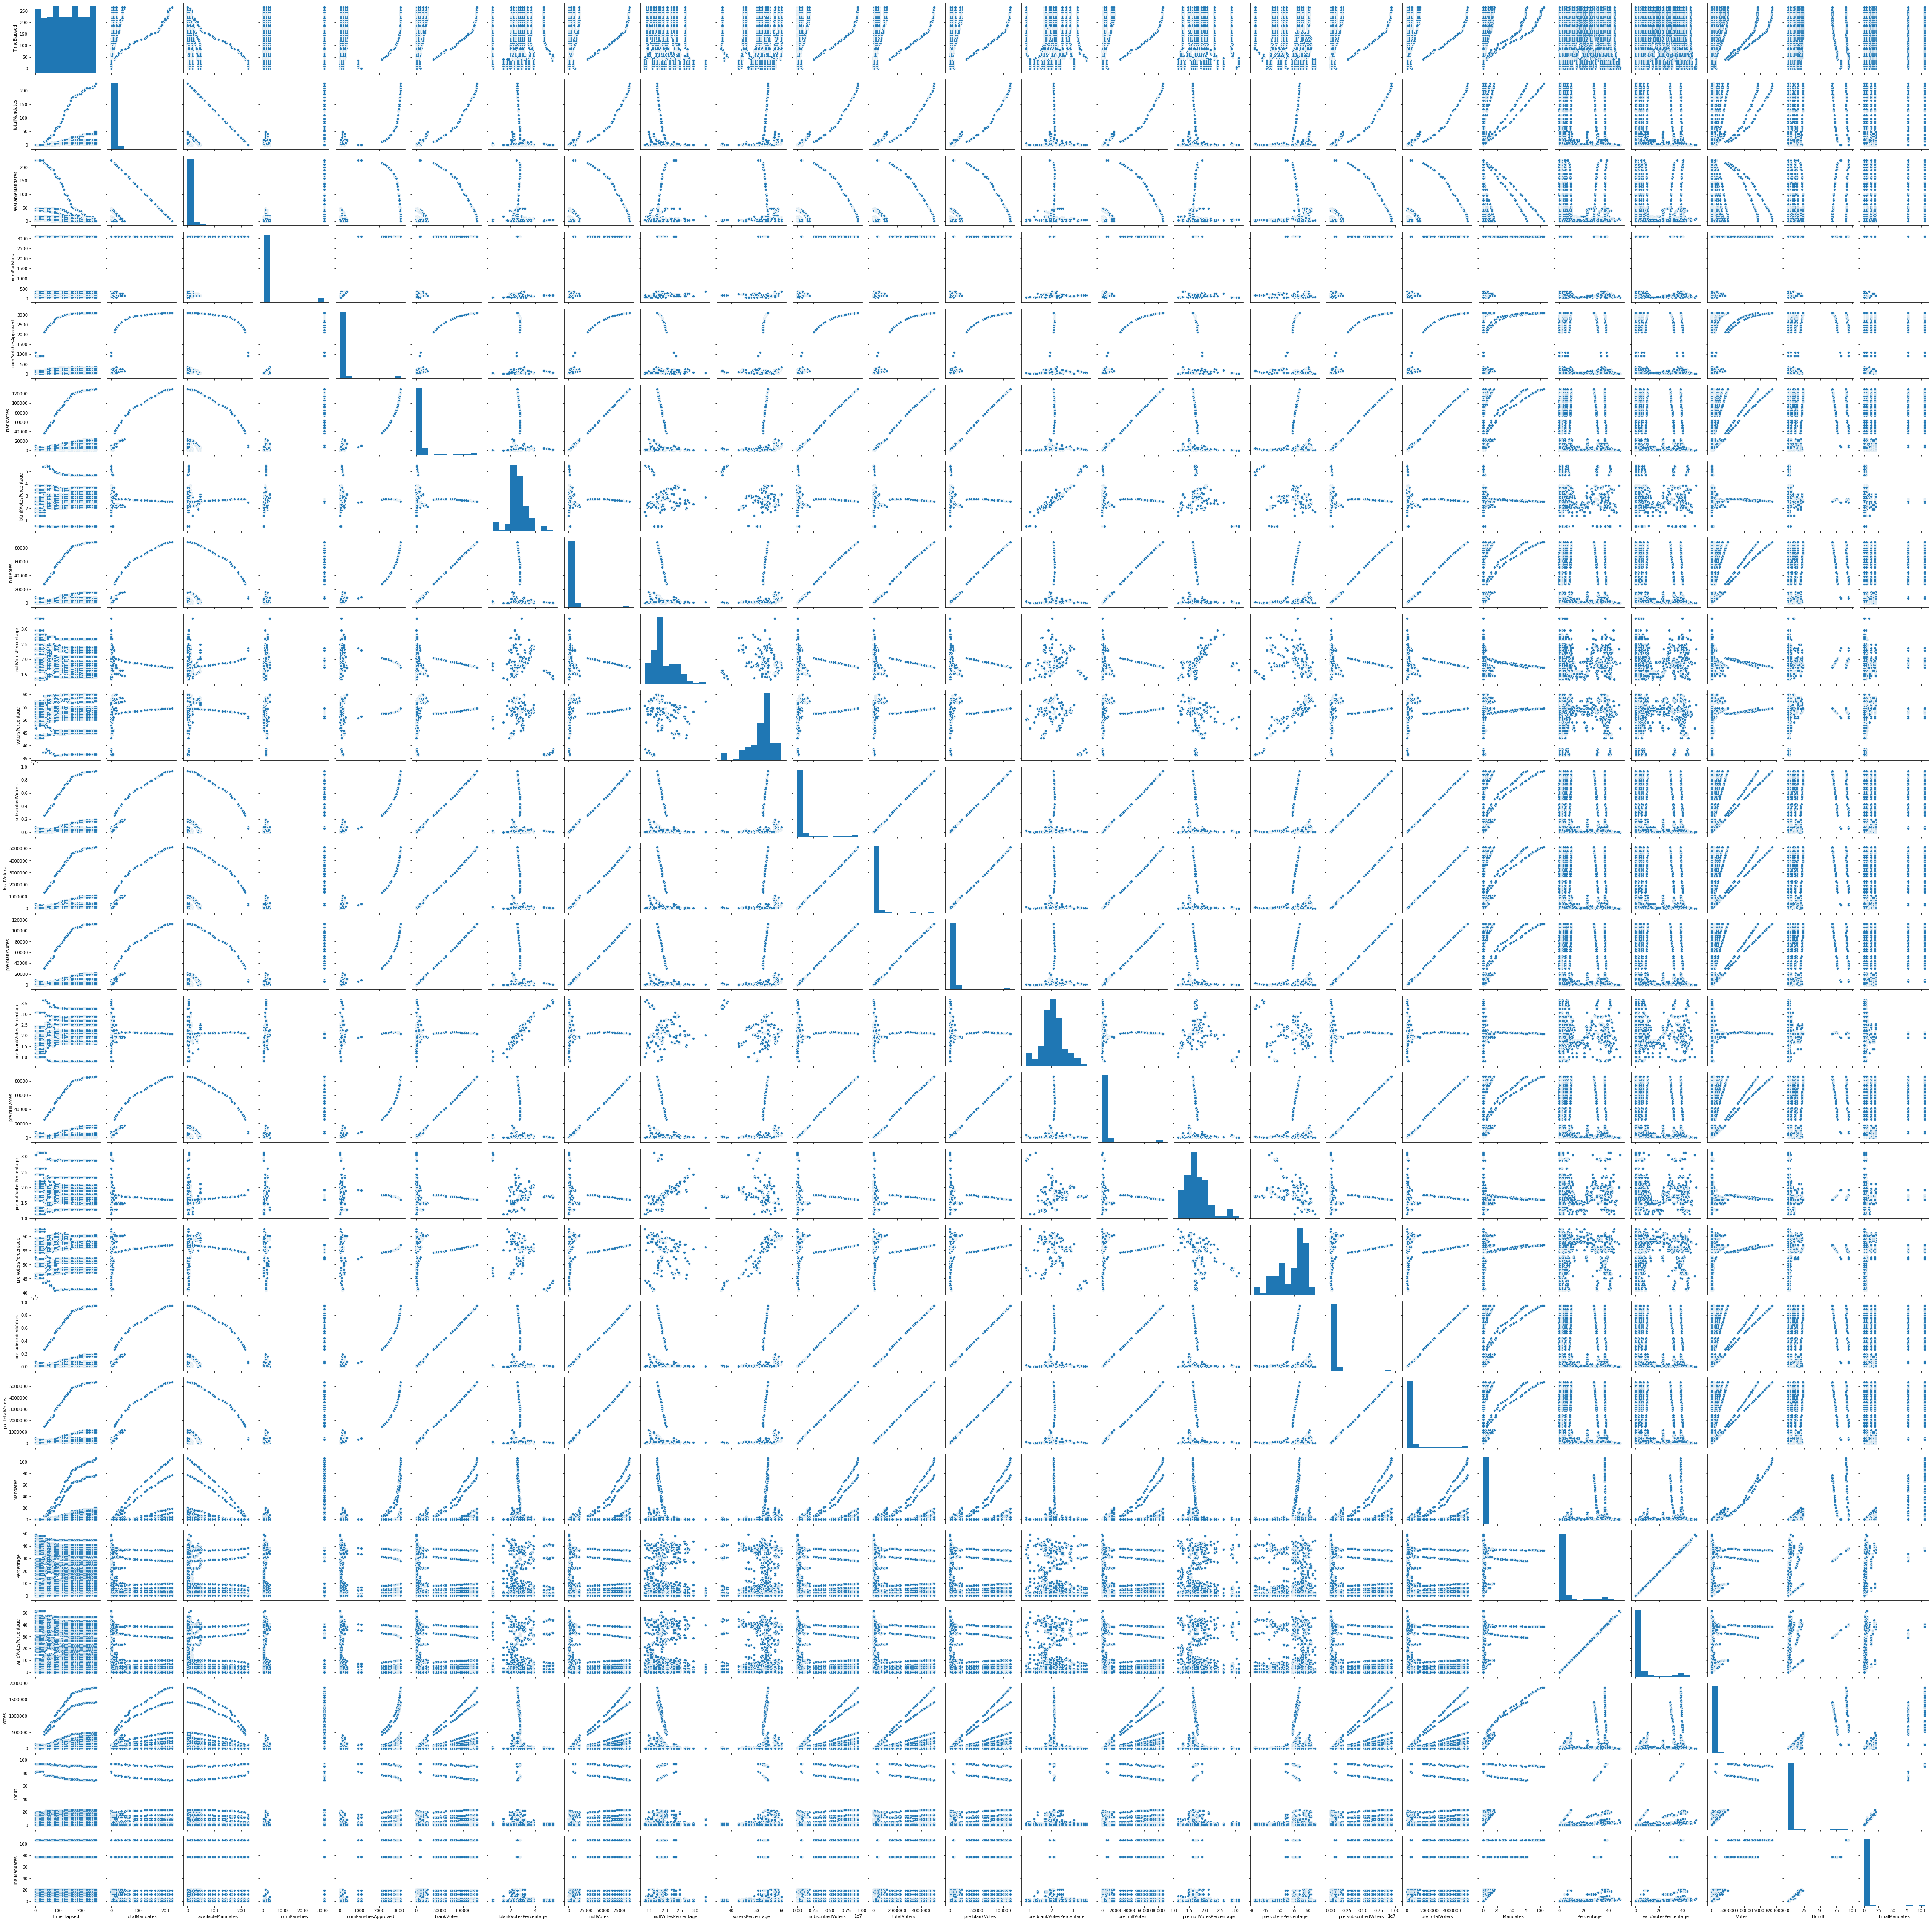

In [286]:
# Pairplot
sns.pairplot(ds)
plt.show()

In [287]:
# using LabelEncoder to change categorical data to number data
le = LabelEncoder()
for i in ds_cat:
    ds[i] = le.fit_transform(ds[i])

In [288]:
# replacing NaN values with 0
ds.replace(np.NaN, 0, inplace=True)

# Removing Outliers

In [289]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (21643, 28)
After removing zscore:  (18333, 28)


In [290]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['FinalMandates'])
y = ds_final['FinalMandates']

In [291]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [292]:
(x.shape, y.shape)

((18333, 27), (18333,))

In [293]:
x.skew()

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
d

In [294]:
for i in range(1,6):
    # Removing skewness of data

    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])

In [295]:
x.skew()

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               0.502478
availableMandates           0.449005
numParishes                 0.483326
numParishesApproved        -0.187735
blankVotes                  0.084969
blankVotesPercentage       -0.844508
nullVotes                   0.356441
nullVotesPercentage        -0.327175
votersPercentage           -0.392023
subscribedVoters            0.538435
totalVoters                 0.310651
pre.blankVotes              0.176820
pre.blankVotesPercentage   -0.410446
pre.nullVotes               0.507774
pre.nullVotesPercentage     0.448328
pre.votersPercentage       -0.514215
pre.subscribedVoters        0.341513
pre.totalVoters             0.262040
Party                       0.009657
Mandates                    0.607780
Percentage                  0.168104
validVotesPercentage        0.202303
Votes                       0.505294
Hondt                       0.521696
d

In [296]:
x.replace(np.NaN, 0, inplace=True)

In [297]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [298]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  52  is:  0.598036255407171


In [299]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
k_best_param = gknr.best_params_
print (k_best_param)

{'n_neighbors': 1}


In [300]:
k_n_nei = k_best_param['n_neighbors']
    
# Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors = k_n_nei)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  54  is:  0.9994040154923467


In [301]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.5106952340836095
Standard deviation for r2 score in linear regression:  0.11981367193685027

*****************

Mean r2 score for KNN regression:  0.9582012341853543
Standard deviation for r2 score in KNN regression:  0.07399621449727607


In [302]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 0.001}

In [303]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.0001)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  52  is:  0.5981428711335146


In [304]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.5126011020895518
Standard deviation in  r2 score for Lasso Regression:  0.12040285268264818


In [305]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
g_best_param = clf.best_params_
print (g_best_param)

{'learning_rate': 0.1, 'n_estimators': 200}


In [306]:
g_lrn_rt = g_best_param['learning_rate']
g_n_est = g_best_param['n_estimators']

In [307]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate= g_lrn_rt, n_estimators= g_n_est)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.9861367108291704
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.02196221121076014


In [308]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  87  is:  0.9989711956095687


In [309]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
a_best_param = clf.best_params_
print (a_best_param)

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 0.001, 'n_estimators': 10}


In [310]:
a_base_est = a_best_param['base_estimator']
a_lrn_rt = a_best_param['learning_rate']
a_n_est = a_best_param['n_estimators']

In [311]:
ada_reg = AdaBoostRegressor(base_estimator = a_base_est, learning_rate=a_lrn_rt, n_estimators=a_n_est)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.9903258719834585
Standard Deviation in  r2 score for Ada Boosting Regression:  0.030784946023526737


In [312]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  57  is:  1.0


In [321]:
# we tried all the models and till now and best model will be selected
# random state corresponding to highest r2 score is 81

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=57, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = a_base_est, learning_rate=a_lrn_rt, n_estimators=a_n_est)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[0. 0. 2. ... 8. 4. 0.]


In [322]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_election.csv')

In [323]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  0.0
r2 score is:  1.0


In [324]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(ada_reg, 'Project_Election.pkl')
#clf = joblib.load('Project_Election.pkl')
#clf.predict(x_test)

['Project_Election.pkl']